In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [4]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [ ]:
scaler = StandardScaler()# StandardScaler: 对训练数据进行了标准化处理
X_norm = scaler.fit_transform(X_train)#fit_transform——同时完成两个操作：fit()：计算训练数据的均值(μ)和标准差(σ)；transform()：应用 Z-score 标准化公式
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


In [ ]:
sgdr = SGDRegressor(max_iter=1000) #SGDRegressor: scikit-learn 中基于随机梯度下降的线性回归模型
sgdr.fit(X_norm, y_train) #这里的fit是机器学习模型sgdr，功能变成了SGDRegressor，输出训练好的模型
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
#sgdr.n_iter 实际完成的迭代次数（可能小于 max_iter，因为可能提前收敛）；sgdr.t_: 权重更新的总次数（等于 n_iter_ × 样本数）

SGDRegressor()
number of iterations completed: 123, number of weight updates: 12178.0


In [ ]:
b_norm = sgdr.intercept_ # 从sgdr模型获取截距b
w_norm = sgdr.coef_      # 从sgdr模型获取权重w
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.35 -21.17 -32.6  -38.  ], b:[363.14]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [14]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm) #输入：归一化后的特征数据 X_norm，输出：预测值数组 y_pred_sgd
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}") #手动计算和模型计算是否等价

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: False
Prediction on training set:
[295.18 485.9  389.52 492.06]
Target values 
[300.  509.8 394.  540. ]


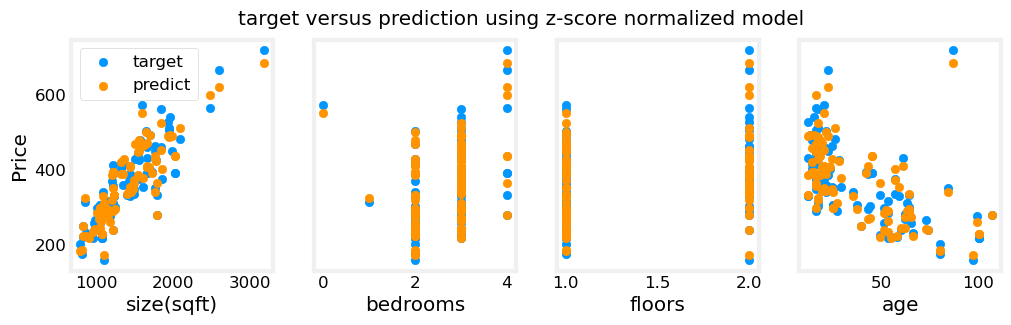

In [9]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## Congratulations!
In this lab you:
- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using gradient descent and feature normalization from that toolkit

sklearn（Scikit-learn）是Python中用于机器学习的一个非常流行的库，它提供了大量的算法和工具来构建和评估模型。线性回归是统计学中用于预测一个或多个自变量（特征）和一个因变量（目标）之间线性关系的方法。回归是一种应用广泛的预测建模技术,这种技术的核心在于预测的结果是连续型变量。在sklearn中，线性回归可以通过LinearRegression类来实现。